In [205]:
import pandas as pd
import glob
import numpy as np

from scipy.stats import gmean, kurtosis, skew
np.seterr(all="ignore") 

releases_folder = "releases"

Summarizes repository releases and combines these summaries:

In [206]:
repo_file_pattern = "candidate_repos_*.csv"
repo_files = glob.glob(repo_file_pattern)    
all_repos = pd.concat([pd.read_csv(file, delimiter=";") for file in repo_files])

files = glob.glob(f"{releases_folder}/*_releases.jsonl")

releases_list = []

for file in files:
    owner, repo_name = file.replace("_releases.jsonl", "").split(f"{releases_folder}\\")[1].split("_", 1)
    releases = pd.read_json(file, lines=True).sort_values(by="id").reset_index(drop=True)
    release_count = releases.shape[0]
    if release_count > 1:
        
        release_dates_diffs = releases["created_at"].diff().apply(lambda x: x/np.timedelta64(1, "D")).fillna(0).tolist()[1:]
        release_dates_diffs_min = min(release_dates_diffs)
        release_dates_diffs_max = max(release_dates_diffs)
        
        release_dates_diffs_mean = np.mean(release_dates_diffs)
        
        # release_dates_diffs_gmean = gmean(release_dates_diffs)
        # release_dates_diffs_skewness = skew(release_dates_diffs)
        # release_dates_diffs_kurtosis = kurtosis(release_dates_diffs)
        # release_dates_diffs_cv = np.std(release_dates_diffs)/release_dates_diffs_mean
        
        try:
            release_dates_diffs_gmean = gmean(release_dates_diffs)
        except:
            release_dates_diffs_gmean = None
        try:
            release_dates_diffs_skewness = skew(release_dates_diffs)
        except:
            release_dates_diffs_skewness = None
        try:
            release_dates_diffs_kurtosis = kurtosis(release_dates_diffs)
        except:
            release_dates_diffs_kurtosis = None
        try:    
            release_dates_diffs_cv = np.std(release_dates_diffs)/release_dates_diffs_mean
        except:
            release_dates_diffs_cv = None
            
    else:
        release_dates_diffs = None
        release_dates_diffs_min = None
        release_dates_diffs_max = None
        release_dates_diffs_mean = None
        release_dates_diffs_gmean = None
        release_dates_diffs_skewness = None
        release_dates_diffs_kurtosis = None
        release_dates_diffs_cv = None
    
    
    release_dates = [date[:-6] for date in releases["created_at"].astype(str).tolist()]
    repo_match = all_repos[(all_repos.OWNER == owner) & (all_repos.NAME == repo_name)]["SEARCH_LANGUAGE"]
    
    if repo_match.shape[0] == 1:
        language = repo_match.iloc[0]
    else:
        language = None
    
    releases_summary = {"owner": owner, "repo": repo_name, "release_count": releases.shape[0], "language": language, 
                        "release_dates": release_dates, "release_dates_diffs": release_dates_diffs, 
                        "release_dates_diffs_min": release_dates_diffs_min, "release_dates_diffs_max": release_dates_diffs_max, 
                        "release_dates_diffs_mean": release_dates_diffs_mean, "release_dates_diffs_gmean": release_dates_diffs_gmean, 
                        "release_dates_diffs_skewness": release_dates_diffs_skewness, 
                        "release_dates_diffs_kurtosis": release_dates_diffs_kurtosis, "release_dates_diffs_cv": release_dates_diffs_cv}
    
    releases_list.append(releases_summary)

In [207]:
releases = pd.DataFrame(releases_list, columns=releases_list[0].keys())

releases

,owner,repo,release_count,language,release_dates,release_dates_diffs,release_dates_diffs_min,release_dates_diffs_max,release_dates_diffs_mean,release_dates_diffs_gmean,release_dates_diffs_skewness,release_dates_diffs_kurtosis,release_dates_diffs_cv
0,101Loop,DatePickerTimeline,3,Java,"[2019-05-08 09:50:05, 2019-05-08 09:50:05, 201...","[0.0, 0.012766203703703703]",0.000000,0.012766,0.006383,0.000000,0.000000e+00,-2.000000,1.000000
1,1adrianb,face-alignment,10,Python,"[2018-10-12 11:20:45, 2018-10-12 11:20:45, 201...","[0.0, 68.15085648148148, 590.0463310185186, 42...",0.000000,590.046331,103.272524,0.000000,2.195198e+00,3.307648,1.720598
2,29jitender,Spotlight,7,Java,"[2016-06-14 14:01:18, 2016-06-17 12:03:28, 201...","[2.9181712962962965, 45.79798611111111, 0.1503...",0.150359,192.662477,44.303206,8.995592,1.609559e+00,0.840872,1.535444
3,3breadt,dd-plist,11,Java,"[2015-02-27 19:11:06, 2015-07-23 17:32:16, 201...","[145.93136574074074, 561.8930902777778, 29.059...",29.059132,989.913044,280.076914,155.707140,1.312669e+00,0.734087,1.043676
4,4thline,cling,5,Java,"[2014-11-05 19:56:35, 2014-11-06 14:43:53, 201...","[0.7828472222222222, 398.0187962962963, 209.81...",0.782847,820.861516,357.370179,85.590011,4.625315e-01,-1.118789,0.845742
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,zonkyio,embedded-database-spring-test,26,Java,"[2018-02-01 12:09:54, 2018-01-04 17:34:27, 201...","[-27.774618055555557, 59.72556712962963, 99.99...",-27.774618,308.365718,66.488418,NaN,2.202010e+00,6.819348,0.929614
2268,zsmartsystems,com.zsmartsystems.zigbee,3,Java,"[2020-01-09 22:43:21, 2020-02-19 17:22:17, 202...","[40.77703703703704, 24.910219907407406]",24.910220,40.777037,32.843628,31.871068,6.830492e-16,-2.000000,0.241551
2269,zsoltherpai,fluent-jdbc,38,Java,"[2015-01-22 11:17:27, 2015-02-04 22:01:45, 201...","[13.447430555555556, 14.979340277777778, 41.81...",0.011690,727.464190,52.429638,8.883704,4.300035e+00,19.137896,2.418836
2270,Zuehlke,ConfZ,14,Python,"[2021-10-20 15:11:50, 2021-11-28 13:32:52, 202...","[38.93127314814815, 1.9944907407407408, 0.8525...",0.852523,87.202998,28.451206,12.919095,7.673279e-01,-0.758211,0.982755


Some visualization examples?

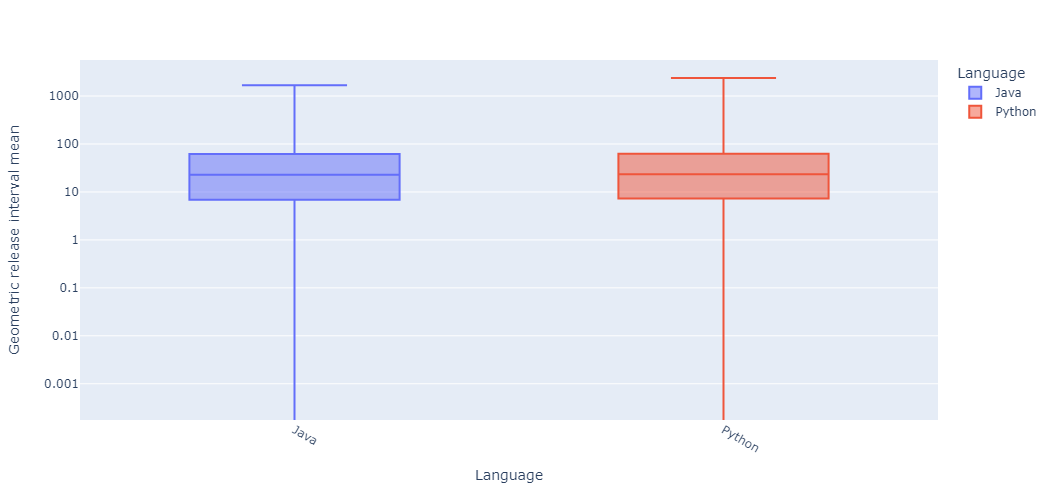

In [209]:
from plotly.express import box

fig = box(releases, x="language", y="release_dates_diffs_gmean", color="language", 
          labels={"language": "Language", "release_dates_diffs_gmean": "Geometric release interval mean"}, height=500, log_y=True)

fig.update_xaxes(tickangle=30).update_traces(boxpoints=False) 

fig.show()

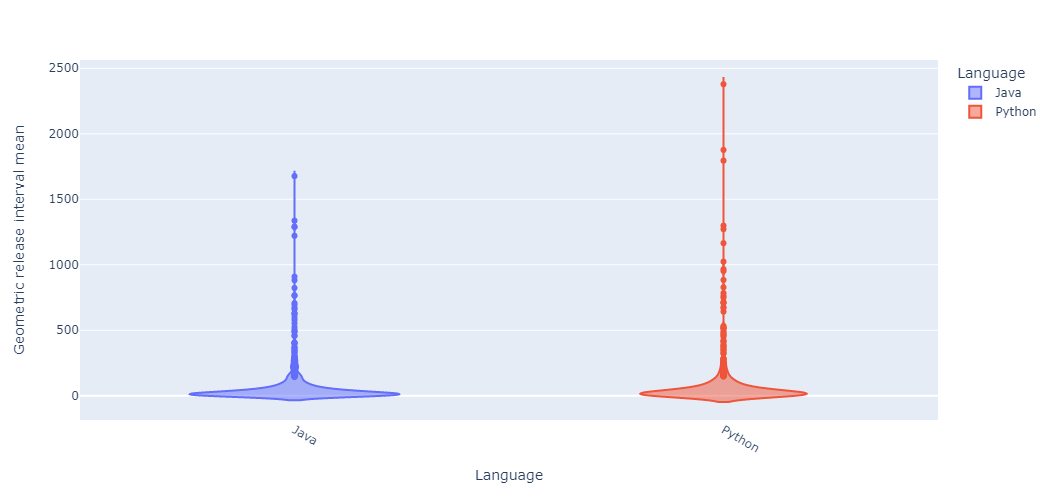

In [212]:
from plotly.express import violin

fig = violin(releases, x="language", y="release_dates_diffs_gmean", color="language", 
             labels={"language": "Language", "release_dates_diffs_gmean": "Geometric release interval mean"}, height=500, log_y=False)

fig.update_xaxes(tickangle=30)

fig.show()

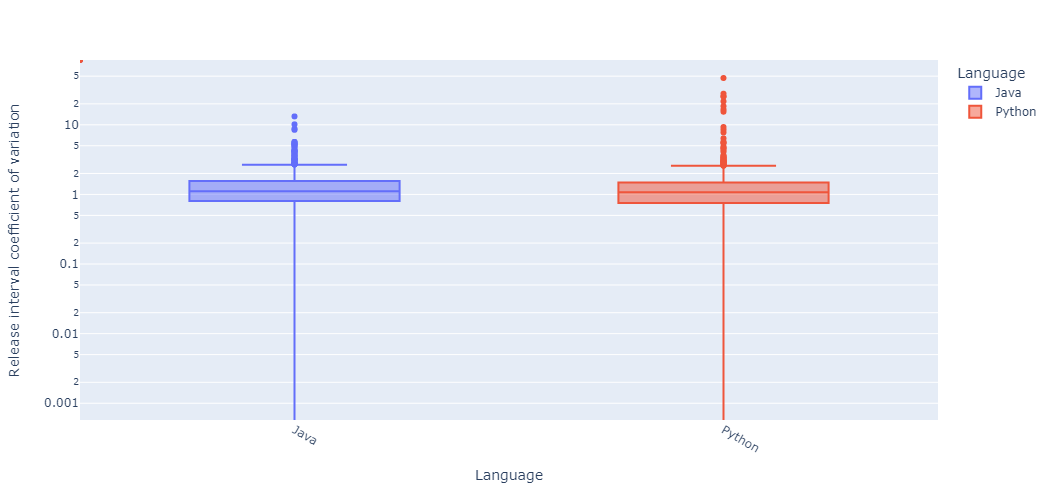

In [214]:
from plotly.express import box

fig = box(releases, x="language", y="release_dates_diffs_cv", color="language", 
          labels={"language": "Language", "release_dates_diffs_cv": "Release interval coefficient of variation"}, height=500, log_y=True)

fig.update_xaxes(tickangle=30)

fig.show()